# Image Classification with Convolutional Neural Networks

Original code at: https://github.com/ageron/handson-ml/blob/master/13_convolutional_neural_networks.ipynb

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


### Plot graphs inline

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

### Download and extract the MNIST libraries

The original site where this dataset is available: http://yann.lecun.com/exdb/mnist/

In [4]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data

# Store the MNIST data in mnist_data/
mnist = input_data.read_data_sets("mnist_data/")

W0819 23:31:07.053544 140735651656576 deprecation.py:323] From <ipython-input-4-bc58aa514b3f>:5: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0819 23:31:07.054604 140735651656576 deprecation.py:323] From /Users/shusma/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0819 23:31:07.056197 140735651656576 deprecation.py:323] From /Users/shusma/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a f

Extracting mnist_data/train-images-idx3-ubyte.gz


W0819 23:31:07.302754 140735651656576 deprecation.py:323] From /Users/shusma/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0819 23:31:07.349221 140735651656576 deprecation.py:323] From /Users/shusma/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


### Helper function to display one digit image

Reshape the data from 1-D array to a 2-D array of 28x28 pixels

In [5]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

### Access the training and test data and the corresponding labels

In [6]:
training_digits, training_labels = mnist.train.next_batch(10000)
test_digits, test_labels = mnist.test.next_batch(200)

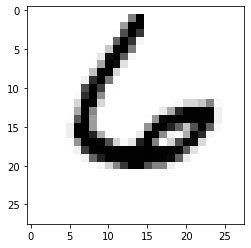

In [7]:
display_digit(training_digits[1])

In [8]:
training_labels[:5]

array([9, 6, 1, 8, 5], dtype=uint8)

### Dimensions of MNIST images

* Each image is 28x28 pixels
* The images are grayscale and have just one channel
* The number of inputs is equal to the number of pixels in each image

In [9]:
height = 28
width = 28
channels = 1
n_inputs = height * width

### Set up a CNN with 2 convolutional layers and one max pool layer

* Specify the number of **feature maps** in each layer, a feature map highlights that area in an image which is most similar to the filter applied
* The kernel size indicates the **dimensions of the filter** which is applied to the image. The filter variables are created for you and initialized randomly
* The stride is the steps by which the filter moves over the input, the **distance between two receptive fields on the input**
* "SAME" padding indicates that the convolutional layer **uses zero padding** on the inputs and will consider all inputs

In [10]:
conv1_feature_maps = 32
conv1_kernel_size = 3
conv1_stride = 1
conv1_pad = "SAME" # means input is zero padded - edges are included

In [11]:
conv2_feature_maps = 64 
conv2_kernel_size = 3
conv2_stride = 2
conv2_pad = "SAME"

In [12]:
pool3_feature_maps = conv2_feature_maps

### One fully connected layer

* 64 neurons in the layer
* 10 outputs corresponding to the digits 0-9

In [13]:
n_fullyconn1 = 64
n_outputs = 10

In [14]:
tf.reset_default_graph()

### Placeholders for training data and labels

* The training dataset placeholder can have any number of instances and each instance is an array of n_inputs = 28x28 = 784 pixels
* The images are fed to the convolutional layer as a 4D tensor *[batch_size, height, width, channels]*

In [15]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])

The shape for the X placeholder is [None, n_inputs] - the None denotes that we do not know how many images we will read in one batch, the *n_input* represents the no.of inputs ie. the 784 pixels = [*batch_size*, 784]

For the CNN we wish our image to have both height and width - therefore we reshape the input tensor - the $-1$ indicates the the first dimension remains the *batch_size*.

In [16]:
y = tf.placeholder(tf.int32, shape=[None], name="y")

### Connect the convolutional layers

* Each layer uses the ReLU activation function

In [17]:
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_feature_maps,
                         kernel_size=conv1_kernel_size,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

W0819 23:31:08.180289 140735651656576 deprecation.py:323] From <ipython-input-17-a6590d9f8110>:4: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0819 23:31:08.190810 140735651656576 deprecation.py:506] From /Users/shusma/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
conv2 = tf.layers.conv2d(conv1, filters=conv2_feature_maps, 
                         kernel_size=conv2_kernel_size,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

In [19]:
conv2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

The *height* and *width* have been reduced to 14, however the depth is preserved and remains equal to the no. of feature maps.

### Connect a max pooling layer

* The filter is a 2x2 filter
* Kernel size = [*batch_size, height, width, channels*] - TF doesn't allow pooling over multiple instances of the batch, restraining the *batch_size* to be 1.
* The stride is 2 both horizontally and vertically
* Stride = [*batch_stride,horizontal, vertical, channels*]
* This results in an image that is **1/4th the size of the original image**
* Reshape the pooled layer to be a **1-D vector (flatten it)**. It now has only 1/4th the number of pixels in each feature map

In [20]:
pool3 = tf.nn.max_pool(conv2,
                       ksize=[1, 2, 2, 1],
                       strides=[1, 2, 2, 1],
                       padding="VALID")

pool3_flat = tf.reshape(pool3, shape=[-1, pool3_feature_maps * 7 * 7])

In [21]:
pool3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In order to feed in this tensor to a fully connected neural network, we have to flatten the results of the pooling layer

In [22]:
pool3_flat.shape

TensorShape([Dimension(None), Dimension(3136)])

In [23]:
fullyconn1 = tf.layers.dense(pool3_flat, n_fullyconn1,
                             activation=tf.nn.relu, name="fc1")

W0819 23:31:08.662863 140735651656576 deprecation.py:323] From <ipython-input-23-3501d0850430>:2: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


### The final output layer with softmax activation

Do not apply the softmax activation to this layer. The *tf.nn.sparse_softmax_cross_entropy_with_logits* will apply the softmax activation as well as calculate the cross-entropy as our cost function

In [24]:
logits = tf.layers.dense(fullyconn1, n_outputs, name="output")

### Cross-entropy as a cost function

* $-\Sigma(Y_{actual} * log[y_{predicted}])$
* Use the Adam optimizer which in most cases performs better than the simple gradient descent

> **Adam Optimiser**

In [25]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
                                                          labels=y)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

### Check correctness and accuracy of the prediction

* Check whether the highest probability output in logits is equal to the y-label - k = 1
* Check the accuracy across all predictions (How many predictions did we get right?)

In [26]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [27]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

### Train with the training data, measure accuracy with test data

In [28]:
n_epochs = 5
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.99 Test accuracy: 0.9768
1 Train accuracy: 1.0 Test accuracy: 0.9812
2 Train accuracy: 1.0 Test accuracy: 0.9868
3 Train accuracy: 1.0 Test accuracy: 0.9882
4 Train accuracy: 0.99 Test accuracy: 0.9878
